In [1]:
# Clean install: Reset broken installs
!pip uninstall -y torch torchvision torchaudio torchao numpy transformers

# Install compatible versions (CPU-friendly, no triton)
!pip install torch==2.0.1 torchvision==0.15.2 --index-url https://download.pytorch.org/whl/cpu
!pip install numpy==1.26.4
!pip install transformers==4.39.3 --no-cache-dir


Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Found existing installation: torchao 0.10.0
Uninstalling torchao-0.10.0:
  Successfully uninstalled torchao-0.10.0
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: transformers 4.51.3
Uninstalling transformers-4.51.3:
  Successfully uninstalled transformers-4.51.3
Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [2]:
!pip uninstall -y torch torchvision torchaudio transformers
!pip install torch==1.13.1+cpu torchvision==0.14.1+cpu torchaudio==0.13.1 --index-url https://download.pytorch.org/whl/cpu
!pip install transformers==4.28.0


Found existing installation: torch 2.0.1+cpu
Uninstalling torch-2.0.1+cpu:
  Successfully uninstalled torch-2.0.1+cpu
Found existing installation: torchvision 0.15.2+cpu
Uninstalling torchvision-0.15.2+cpu:
  Successfully uninstalled torchvision-0.15.2+cpu
Found existing installation: transformers 4.39.3
Uninstalling transformers-4.39.3:
  Successfully uninstalled transformers-4.39.3
Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 MB 6.1 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement torchvision==0.14.1+cpu (from versions: 0.1.6, 0.2.0, 0.15.0+cpu, 0.15.1+cpu, 0.15.2+cpu, 0.16.0+cpu, 0.16.1+cpu, 0.16.2+cpu, 0.17.0+cpu, 0.17.1+cpu, 0.17.2+cpu, 0.18.0+cpu, 0.18.1+cpu, 0.19.0+cpu, 0.19.1+cpu, 0.20.0+cpu, 0.20.1+cpu, 0.21.0+cpu, 0.22.0+cpu)
ERROR: No matching distribution found for torchvision==0.14.1+cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.0/110.0 kB 4.8 MB/s eta 0:00:00
   ━━━━

In [3]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install git+https://github.com/NVlabs/describe-anything



  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-u4ehl7kh
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-u4ehl7kh
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=775dc0930f475cea11f8eed914bf333154ed0910634f69b51ca053b2feac5118
  Stored in directory: /tmp/pip-ephem-wheel-cache-i2hktbc4/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything
  Cloning https://github.com/NVlabs/describe-anything to /tmp/pip-req-build-oeqxc9j6
  Running command git clone --filter=blob:none --quiet https://github.com/NVlabs/describe-anything /tmp/pip-req-build-oeqxc9j6
  Resolved https://github.com/NVlabs/describe-anything to co

In [1]:
import torch
from segment_anything import sam_model_registry
import urllib.request
import os

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = "sam_vit_h_4b8939.pth"

if not os.path.exists(CHECKPOINT_PATH):
    url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
    urllib.request.urlretrieve(url, CHECKPOINT_PATH)
    print("Downloaded checkpoint file")

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [18]:
!pip uninstall -y numpy
!pip install numpy==1.23.5


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 111.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
bigframes 2.3.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=

In [1]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install git+https://github.com/NVlabs/describe-anything


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-hkjwo5p7
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-hkjwo5p7
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/NVlabs/describe-anything to /tmp/pip-req-build-w3ptdxj8
  Running command git clone --filter=blob:none --quiet https://github.com/NVlabs/describe-anything /tmp/pip-req-build-w3ptdxj8
  Resolved https://github.com/NVlabs/describe-anything to commit 0445cd56e6a60a151f64b2fc002cc78d2fb607a9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
from segment_anything import sam_model_registry
import urllib.request
import os

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = "sam_vit_h_4b8939.pth"

if not os.path.exists(CHECKPOINT_PATH):
    url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
    urllib.request.urlretrieve(url, CHECKPOINT_PATH)
    print("Downloaded checkpoint file")

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)

In [2]:
from segment_anything import SamAutomaticMaskGenerator
mask_generator = SamAutomaticMaskGenerator(sam)


In [3]:
#Helper
import numpy as np
import matplotlib.pyplot as plt
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0) #alpha=0.6 makes the mask semi-transparent.
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))


In [4]:
  print(f"SAM {MODEL_TYPE} model loaded on {DEVICE}")

SAM vit_h model loaded on cuda


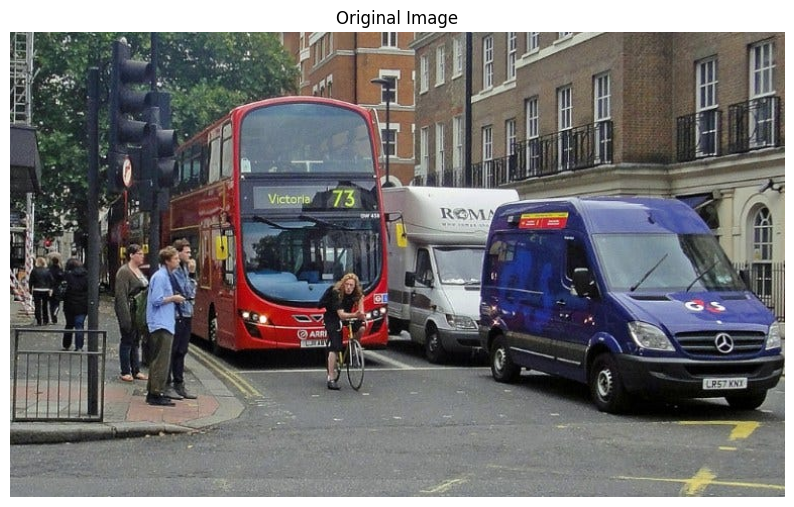

In [5]:
# Cell 5: Load your image
import cv2
image_path = "/content/1_v0Bm-HQxWtpbQ0Yq463uqw.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")
plt.show()

In [6]:
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,
)

masks = mask_generator.generate(image)

filtered_masks = [m['segmentation'] for m in masks if m['stability_score'] > 0.7]

print(f"Total masks generated: {len(masks)}")
print(f"Number of high-confidence masks: {len(filtered_masks)}")

Total masks generated: 267
Number of high-confidence masks: 267


In [7]:
!pip install ultralytics

In [8]:
from ultralytics import YOLO
yolo = YOLO('yolov8m.pt').to(DEVICE)
print("YOLOv8 model loaded with predefined COCO classes.")

YOLOv8 model loaded with predefined COCO classes.


In [9]:
# Cell 10: Object detection function (using all YOLOv8 classes)
def detect_objects(image, score_threshold=0.1):
    """Returns detected objects as list of dicts with bbox, label, score"""
    results = yolo.predict(image, conf=score_threshold, verbose=False)

    detections = []
    for result in results:
        for box in result.boxes:
            # Convert tensor to list and get coordinates
            xyxy = box.xyxy.cpu().numpy()[0].tolist()
            conf = box.conf.cpu().numpy()[0]
            cls_id = int(box.cls.cpu().numpy()[0])
            label = yolo.names[cls_id]

            detections.append({
                'bbox': [int(coord) for coord in xyxy],  # [x1,y1,x2,y2]
                'label': label,
                'score': float(conf)
            })

    return sorted(detections, key=lambda x: x['score'], reverse=True)  # Highest score first


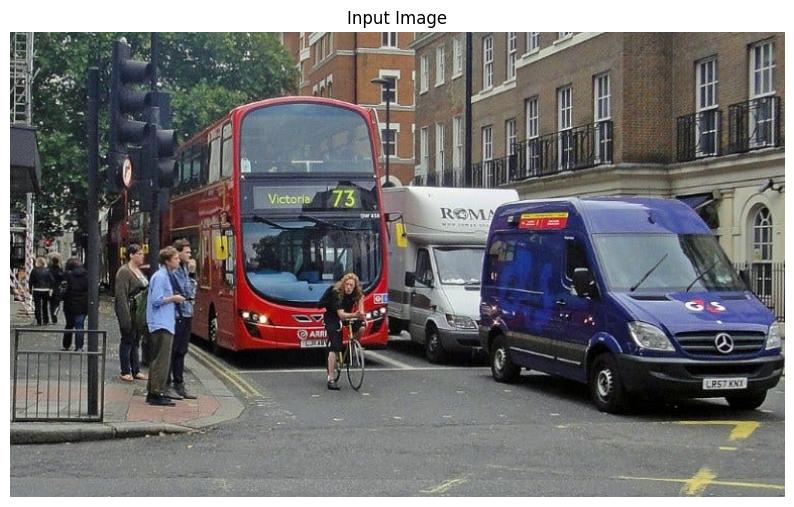

In [10]:
# Cell 11: Load and display input image
image_path = "/content/1_v0Bm-HQxWtpbQ0Yq463uqw.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Input Image")
plt.show()


In [11]:
detections = detect_objects(image, score_threshold=0.15
                            )

print(f"Detected {len(detections)} objects:")
for det in detections:
    print(f"- {det['label']} (confidence: {det['score']:.2f}): {det['bbox']}")

Detected 15 objects:
- bus (confidence: 0.95): [152, 63, 376, 320]
- truck (confidence: 0.86): [370, 152, 505, 330]
- person (confidence: 0.84): [304, 238, 355, 355]
- person (confidence: 0.80): [103, 212, 137, 346]
- person (confidence: 0.78): [48, 225, 78, 316]
- person (confidence: 0.77): [133, 212, 178, 372]
- person (confidence: 0.77): [18, 224, 44, 292]
- truck (confidence: 0.76): [463, 162, 767, 379]
- traffic light (confidence: 0.71): [99, 7, 142, 115]
- bicycle (confidence: 0.67): [324, 280, 355, 356]
- person (confidence: 0.46): [158, 226, 185, 365]
- person (confidence: 0.43): [36, 221, 55, 290]
- person (confidence: 0.29): [162, 206, 184, 243]
- person (confidence: 0.21): [122, 246, 140, 335]
- traffic light (confidence: 0.16): [143, 96, 166, 155]


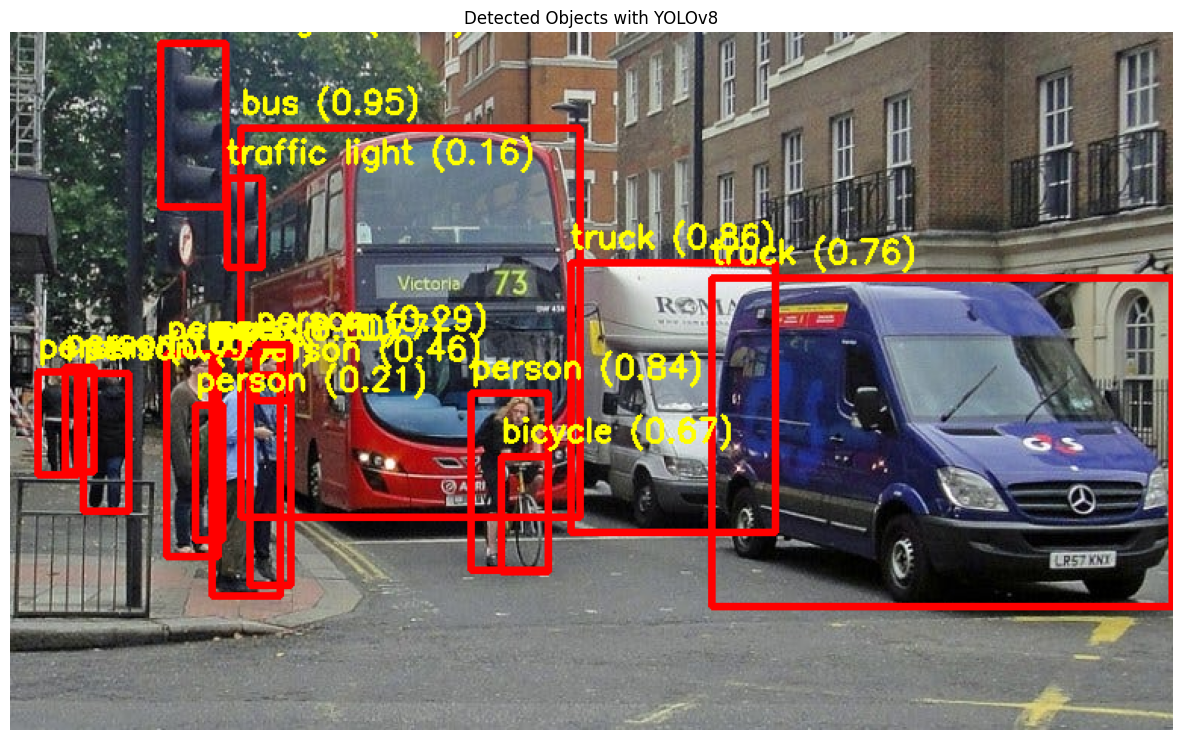

In [12]:
vis_image = image.copy()

for det in detections:
    x1, y1, x2, y2 = det['bbox']
    cv2.rectangle(vis_image, (x1, y1), (x2, y2), (255, 0, 0), 3)
    label = f"{det['label']} ({det['score']:.2f})"
    cv2.putText(vis_image, label, (x1, y1-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)

plt.figure(figsize=(15, 10))
plt.imshow(vis_image)

plt.axis('off')
plt.title("Detected Objects with YOLOv8")
plt.show()

In [13]:
import json
import cv2

with open("detections.json", "w") as f:
    json.dump(detections, f, indent=2)

cv2.imwrite("detected_objects.jpg", cv2.cvtColor(vis_image, cv2.COLOR_RGB2BGR))
print("Results saved to detections.json and detected_objects.jpg")

Results saved to detections.json and detected_objects.jpg


In [14]:
def calculate_iou(mask, bbox):
    """Compute Intersection-over-Union between mask and bbox"""
    x1, y1, x2, y2 = map(int, bbox)
    bbox_mask = np.zeros(mask.shape[:2], dtype=np.uint8)
    cv2.rectangle(bbox_mask, (x1, y1), (x2, y2), 255, -1)
    mask_bool = mask > 0
    bbox_bool = bbox_mask > 0
    intersection = np.logical_and(mask_bool, bbox_bool).sum()
    union = np.logical_or(mask_bool, bbox_bool).sum()
    return intersection / max(union, 1e-6)

binary_masks = [m['segmentation'].astype(np.uint8) for m in masks]

object_groups = []
for det in detections:
    group = {
        'label': det['label'],
        'bbox': [int(x) for x in det['bbox']],
        'masks': []
    }
    for mask in binary_masks:
        iou = calculate_iou(mask, group['bbox'])
        if iou > 0.5:
            group['masks'].append(mask)
    object_groups.append(group)


In [15]:
def mask_to_bbox(mask):
    """Convert binary mask to bounding box coordinates [x1,y1,x2,y2]"""
    contours, _ = cv2.findContours(mask.astype(np.uint8),
                 cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None
    x, y, w, h = cv2.boundingRect(contours[0])
    return [x, y, x+w, y+h]

final_objects = []

for group in object_groups:
    if not group['masks']:
        continue

    merged = np.zeros_like(binary_masks[0], dtype=np.uint8)
    for mask in group['masks']:
        merged = cv2.bitwise_or(merged, mask.astype(np.uint8))

    bbox_coords = mask_to_bbox(merged > 0)
    if bbox_coords is None:
        continue

    x1, y1, x2, y2 = bbox_coords
    h, w = image.shape[:2]
    x1, y1 = max(0, x1), max(0, y1)
    x2, y2 = min(w, x2), min(h, y2)

    if x2 <= x1 or y2 <= y1:
        continue

    cropped = image[y1:y2, x1:x2]
    masked_crop = cv2.bitwise_and(cropped, cropped, mask=merged[y1:y2, x1:x2])

    final_objects.append({
        'label': group['label'],
        'bbox': [x1, y1, x2, y2],
        'merged_mask': merged[y1:y2, x1:x2],
        'cropped_image': masked_crop
    })

print(f"Successfully processed {len(final_objects)} objects")

Successfully processed 8 objects


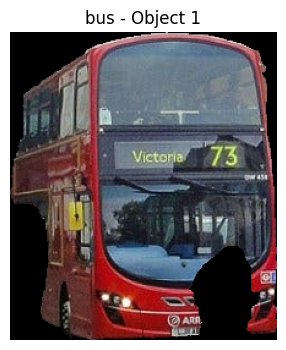

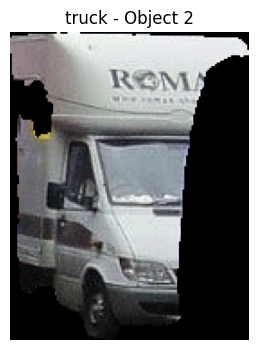

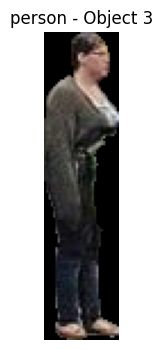

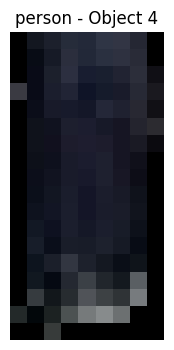

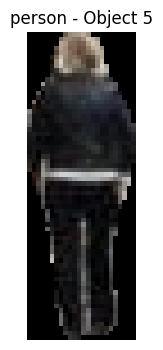

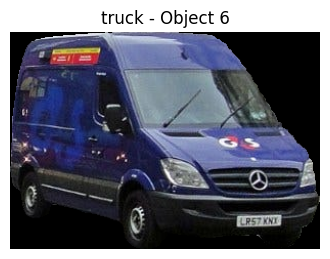

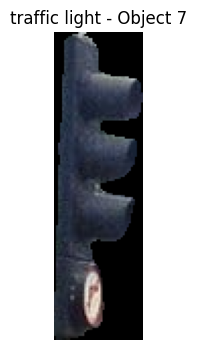

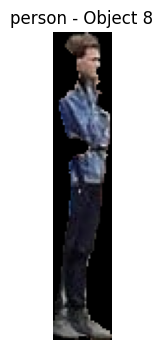

In [16]:
for i, obj in enumerate(final_objects):
    plt.figure(figsize=(4, 4))
    plt.title(f"{obj['label']} - Object {i+1}")
    plt.imshow(obj['cropped_image'])
    plt.axis('off')
    plt.show()

In [17]:
import os
save_dir = "cropped_objects"
os.makedirs(save_dir, exist_ok=True)

for i, obj in enumerate(final_objects):
    cropped_img = obj['cropped_image']
    cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
    filename = f"{obj['label']}_object_{i+1}.png"
    filepath = os.path.join(save_dir, filename)
    cv2.imwrite(filepath, cropped_img)
    print(f"Saved {filepath}")


Saved cropped_objects/bus_object_1.png
Saved cropped_objects/truck_object_2.png
Saved cropped_objects/person_object_3.png
Saved cropped_objects/person_object_4.png
Saved cropped_objects/person_object_5.png
Saved cropped_objects/truck_object_6.png
Saved cropped_objects/traffic light_object_7.png
Saved cropped_objects/person_object_8.png


In [18]:
!pip install git+https://github.com/NVlabs/describe-anything


  Cloning https://github.com/NVlabs/describe-anything to /tmp/pip-req-build-q4uy2ciy
  Running command git clone --filter=blob:none --quiet https://github.com/NVlabs/describe-anything /tmp/pip-req-build-q4uy2ciy
  Resolved https://github.com/NVlabs/describe-anything to commit 0445cd56e6a60a151f64b2fc002cc78d2fb607a9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [25]:
!pip install --upgrade numpy


In [29]:
pip install numpy==2.2.5


  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dam 1.0.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.


In [1]:
import numpy as np
print(np.__version__)


2.2.5


In [18]:
from dam.describe_anything_model import DescribeAnythingModel



In [19]:
from PIL import Image
import torch
model = DescribeAnythingModel(
    model_path="nvidia/DAM-3B",
    conv_mode="v1",
    prompt_mode="full+crop",  # or "focal_crop+crop_mask"
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [20]:
image = Image.open("/content/1_v0Bm-HQxWtpbQ0Yq463uqw.jpg").convert("RGB")


In [25]:
import numpy as np
import cv2
from PIL import Image

def numpy_to_pil_mask(np_img):
    """Convert a NumPy mask or image to a PIL grayscale mask."""
    if len(np_img.shape) == 3 and np_img.shape[2] == 3:
        np_img = cv2.cvtColor(np_img, cv2.COLOR_BGR2RGB)
        pil_img = Image.fromarray(np_img).convert("L")
    else:
        pil_img = Image.fromarray(np_img).convert("L")
    return pil_img

def embed_mask_in_full_image(mask_crop, bbox, full_shape):
    """
    Embed a smaller mask_crop into a full-size mask of shape full_shape (H, W).
    bbox = [x1, y1, x2, y2] defines where to place the mask_crop.
    """
    full_mask = np.zeros(full_shape, dtype=np.uint8)
    x1, y1, x2, y2 = bbox
    # Resize mask_crop to bbox size if needed
    resized_mask = cv2.resize(mask_crop, (x2 - x1, y2 - y1), interpolation=cv2.INTER_NEAREST)
    full_mask[y1:y2, x1:x2] = resized_mask
    return full_mask

descriptions = []

if isinstance(image, Image.Image):
    image_np = np.array(image)  # RGB
    image = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

image_height, image_width = image.shape[:2]

for i, obj in enumerate(final_objects):
    bbox = obj['bbox']
    mask_crop = obj['merged_mask']  # smaller mask cropped to bbox size or close
    full_mask = embed_mask_in_full_image(mask_crop, bbox, (image_height, image_width))
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    mask_pil = numpy_to_pil_mask(full_mask)

    query = "<image> Describe the object in the highlighted region in detail."

    description = model.get_description(
        image_pil=image_pil,
        mask_pil=mask_pil,
        query=query,
        temperature=0.2,
        top_p=0.9,
        num_beams=1,
        max_new_tokens=512,
    )

    print(f"Description for object {i+1} ({obj['label']}):\n{description}\n")
    descriptions.append(description)


Description for object 1 (bus):
A red double-decker bus with a destination sign displaying "Victoria 73" above the windshield. The bus has a curved front with a large windshield and a visible driver's side window. The lower deck has a row of windows, and the upper deck has a set of windows with reflections. The bus features a black bumper, and the side displays a route number and destination. The vehicle's registration plate is mounted on the lower front.

Description for object 2 (truck):
A white delivery truck with a high roof and a large cargo area. The front cab features a black grille, headlights, and a side mirror on the driver's side. The truck's body has a gray lower panel and a black stripe running horizontally along the side. The cargo area is white with visible text and graphics on the side.

Description for object 3 (person):
A person with short dark hair, wearing a dark gray cardigan over a white top, dark pants, and brown shoes, standing with their arms crossed.

Descript

In [1]:

import nbformat
def clean_notebook(input_path, output_path=None):
    if output_path is None:
        output_path = input_path
    nb = nbformat.read(input_path, as_version=4)
    if 'widgets' in nb.get('metadata', {}):
        del nb['metadata']['widgets']
    nbformat.write(nb, output_path)

clean_notebook("SAM_YOLO_DAM.ipynb")